True


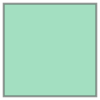

In [2]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.000000000011, 0.000000000011)

polygon = Polygon([(0.00000000001, 0.00000000001), (0.00000000001, 1), (1, 1), (1, 0.00000000001)])
print(polygon.contains(point))
polygon

API calls:


<function matplotlib.pyplot.show(*args, **kw)>

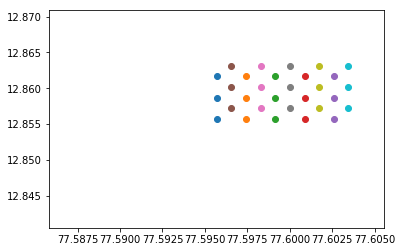

In [14]:
import requests

import matplotlib.pyplot as plt

x_coord=77.6
y_coord=12.86
box_edge=1000      #(in m)

ll_x= x_coord-(0.000008626315*(box_edge/2))
ll_y= y_coord-(0.000008626315*(box_edge/2))
ur_x= x_coord+(0.000008626315*(box_edge/2))
ur_y= y_coord+(0.000008626315*(box_edge/2))

'''
boundingbox_poly=Polygon([(ll_x,ll_y),(ll_x,ur_y),(ur_x,ur_y),(ur_x,ll_y)])
x,y = polygon1.exterior.xy
plt.plot(x,y)
x,y = boundingbox_poly.exterior.xy
plt.plot(x,y)
'''

(x,y)=(ll_x,ll_y)
movement=0.000008626315*200 #metres-- diameter
count=0
#12.995629-12.993990~190m
api_calls=0

inside_points=[]

print("API calls:")

while(y<ur_y):
    while(x<ur_x):
        plt.scatter(x,y)
        inside_points.append(str(y)+','+str(x))
        api_calls+=1
        print(api_calls,end='\r')
        x+=movement
    y+=0.86602540375*movement
    if(count%2==0):      
        x=ll_x+(movement/2)
    else:
        x=ll_x
    count+=1
    
plt.show


In [15]:
print(inside_points)

['12.855686842499999,77.5956868425', '12.855686842499999,77.5974121055', '12.855686842499999,77.5991373685', '12.855686842499999,77.6008626315', '12.855686842499999,77.60258789449999', '12.85718096408615,77.596549474', '12.85718096408615,77.598274737', '12.85718096408615,77.6', '12.85718096408615,77.60172526299999', '12.85718096408615,77.60345052599999', '12.8586750856723,77.5956868425', '12.8586750856723,77.5974121055', '12.8586750856723,77.5991373685', '12.8586750856723,77.6008626315', '12.8586750856723,77.60258789449999', '12.86016920725845,77.596549474', '12.86016920725845,77.598274737', '12.86016920725845,77.6', '12.86016920725845,77.60172526299999', '12.86016920725845,77.60345052599999', '12.8616633288446,77.5956868425', '12.8616633288446,77.5974121055', '12.8616633288446,77.5991373685', '12.8616633288446,77.6008626315', '12.8616633288446,77.60258789449999', '12.86315745043075,77.596549474', '12.86315745043075,77.598274737', '12.86315745043075,77.6', '12.86315745043075,77.6017252

API calls:


<function matplotlib.pyplot.show(*args, **kw)>

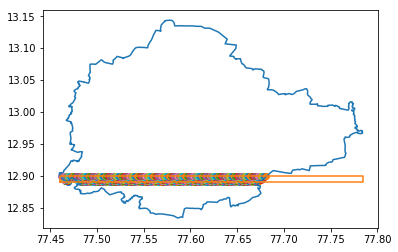

In [16]:
import requests
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as pat


url = 'https://nominatim.openstreetmap.org/search.php?q=bangalore&polygon_geojson=1&format=json'
response = requests.get(url)

dic=response.json()

#print(dic[0]['geojson']['coordinates'][0][0])

boundary=[]


for i in range(len(dic[0]['geojson']['coordinates'][0])):
    boundary.append((dic[0]['geojson']['coordinates'][0][i][0],dic[0]['geojson']['coordinates'][0][i][1]))

#print(boundary)

#careful with x and y and y and x
#x=>longitude y=>latitude

polygon1 = Polygon(boundary)


bbox=dic[0]['boundingbox']
#print(bbox)
ll_x=float(bbox[2])
ll_y=12.89
ur_x=float(bbox[3])
ur_y=12.90

boundingbox_poly=Polygon([(ll_x,ll_y),(ll_x,ur_y),(ur_x,ur_y),(ur_x,ll_y)])


x,y = polygon1.exterior.xy
plt.plot(x,y)
x,y = boundingbox_poly.exterior.xy
plt.plot(x,y)

(x,y)=(ll_x,ll_y)
movement=0.000008626315*200 #metres-- diameter
count=0

#12.995629-12.993990~190m
api_calls=0
inside_points=[]

print("API calls:")

while(y<ur_y):
    while(x<ur_x):
        #check if in
        if(polygon1.contains(Point(x,y))):
           plt.scatter(x,y)
           inside_points.append(str(y)+','+str(x))
           api_calls+=1
           print(api_calls,end='\r')
        x+=movement
    y+=0.86602540375*movement
    if(count%2==0):
        x=ll_x+(movement/2)
    else:
        x=ll_x
    count+=1
    
plt.show


In [17]:
print(inside_points)

['12.89,77.46872881499999', '12.89,77.48253091899997', '12.89,77.48425618199997', '12.89,77.48598144499996', '12.89,77.48770670799996', '12.89,77.48943197099996', '12.89,77.49115723399996', '12.89,77.49288249699995', '12.89,77.49460775999995', '12.89,77.49633302299995', '12.89,77.49805828599995', '12.89,77.49978354899994', '12.89,77.50150881199994', '12.89,77.50323407499994', '12.89,77.50495933799994', '12.89,77.50668460099993', '12.89,77.50840986399993', '12.89,77.51013512699993', '12.89,77.51186038999992', '12.89,77.51358565299992', '12.89,77.51531091599992', '12.89,77.51703617899992', '12.89,77.51876144199991', '12.89,77.52048670499991', '12.89,77.52221196799991', '12.89,77.5239372309999', '12.89,77.5256624939999', '12.89,77.5273877569999', '12.89,77.5291130199999', '12.89,77.5308382829999', '12.89,77.53256354599989', '12.89,77.53428880899989', '12.89,77.53601407199989', '12.89,77.53773933499988', '12.89,77.53946459799988', '12.89,77.54118986099988', '12.89,77.54291512399988', '12.8

In [ ]:
import requests
import pandas as pd 
from datetime import date
import os.path
import json
import time


def query(url):

#Tries 10 times before token is activated by Google. Time vs API calls trade-off!!!!
  
    for i in range(10):
        time.sleep(1)
        response = requests.get(url)
        res_dic=response.json()                 #returns python dictionary not JSON!
        
        if(res_dic['status'] not in ('OK','ZERO_RESULTS')):
            print("failure,quering again!")
            pass
        else:
            break;
            
    if(res_dic['status'] in ('OK','ZERO_RESULTS')):
        return res_dic
    else:
        raise Exception("Some error encountered when querying!")
     

def asset_finder(asset_type, center, next_token=None):

    apikey=PUT_YOUR_API_KEY_HERE    
    url="https://maps.googleapis.com/maps/api/place/nearbysearch/json?"

    if(next_token is None):
        req_url=url+"location="+center+"&radius="+radius+"&type="+asset_type+"&key="+apikey
    else:
        req_url=url+"&key="+apikey+"&pagetoken="+next_token

    print("page-break")
    
    res_dic=query(req_url)
       
    for i in range(len(res_dic['results'])):
        data_dic={'_id':"",'name':"", 'lat':"", 'lng':""}
        
        data_dic['name']=res_dic['results'][i]['name']
        lat_key=res_dic['results'][i]['geometry']['location']['lat']
        lon_key=res_dic['results'][i]['geometry']['location']['lng']
        data_dic['_id']=str(lat_key)+" "+str(lon_key)
        data_dic['lat']=lat_key
        data_dic['lon']=lon_key
        
        print(data_dic)
        try:
            addtoDataframe(data_dic)            
        except:
            print("that record was not written due to error")
        

    if 'next_page_token' in list(res_dic.keys()):
        print("Going to next page!")
        asset_finder(asset_type, center=center,next_token=res_dic['next_page_token'])
        
    
def addtoDataframe(data):

    x = mycol.insert_one(data)
    print(x.inserted_id)

      
def main():

    for i in range(len(inside_points)):
        asset_finder(asset,inside_points[i])
        print("done with point: "+str(i))
        
    
    
      
#PARAMETERS TO CHANGE
#########################################
radius="116"                                   #200/root(3) in mtrs
asset="school"                                   #valid assets: atm , bank, bar,  cafe, bus_station etc.
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["final"]
#########################################
main()

#NOTE: entries can be repeated as Possibility of overlap due to radius being larger in API request than 
#if specified movement wise.

#make unique name of DB as _id is used as primary key. so duplicates are not appended.

#implement return 0 and a 'driver-file' to change assets and to check successful execution via commandline,


